In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch

# import shapefile using geopandas
dh_plot_locations = gpd.read_file('data/ruimtelijke_kengetallen2019/ruimtelijke_kengetallen2019.shp').set_index("code")

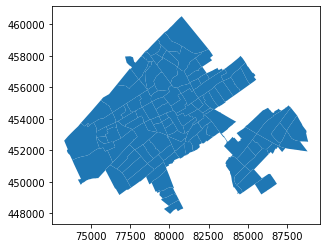

In [2]:
dh_plot_locations.plot()

In [3]:
dh_plot_locations.head(3)

,std_koppel,std_id_s,std_id_i,wk_koppel,wk_id_s,wk_id_i,brt_koppel,brt_id_s,brt_id_i,brt_naam,...,wps3,wps4,wps5,wps6,wps7,wps8,wps9,partauto,partmotor,geometry
code,,,,,,,,,,,,,,,,,,,,,
1,04 Scheveningen,04,4,07 Scheveningen,07,7,01 Oud Scheveningen,01,1,Oud Scheveningen,...,147.0,257.0,38.0,104.0,30.0,36.0,28.0,976,106,"POLYGON ((78223.220 457985.570, 78231.290 4579..."
2,04 Scheveningen,04,4,07 Scheveningen,07,7,02 Vissershaven,02,2,Vissershaven,...,1117.0,606.0,3.0,179.0,61.0,317.0,30.0,1327,111,"POLYGON ((77191.010 457958.840, 77522.880 4579..."
3,04 Scheveningen,04,4,07 Scheveningen,07,7,03 Scheveningen Badplaats,03,3,Scheveningen Badplaats,...,1144.0,588.0,212.0,95.0,101.0,534.0,46.0,1883,166,"POLYGON ((78464.480 458272.310, 78487.180 4582..."


In [4]:
dh_plot_locations.columns

Index(['std_koppel', 'std_id_s', 'std_id_i', 'wk_koppel', 'wk_id_s', 'wk_id_i',
       'brt_koppel', 'brt_id_s', 'brt_id_i', 'brt_naam', 'wk_naam', 'std_naam',
       'opp_in_m2', 'aantbev', 'lft019', 'lft2064', 'lft65_', 'geslm', 'geslv',
       'etnicbs8', 'etnicbs9', 'aantgeb', 'aantstrf', 'natloop', 'vesttot',
       'vertrtot', 'saldveve', 'bevsaldo', 'aanthh', 'ephh', 'mphmk', 'mphzk',
       'eenoud', 'srwon1', 'srwon2', 'srwon3', 'srwon4', 'srwon5', 'srwon6',
       'srwon7', 'srwon8', 'srwon9', 'srwon10', 'srwon11', 'srwon12',
       'srwon13', 'eigend1', 'eigend3', 'eigend2', 'eigend4', 'aantozb',
       'bvowon', 'ttprs', 'anietwon', 'akantoor', 'awinkels', 'abedrijf',
       'ahoreca', 'ahotels', 'auitgaan', 'acultuur', 'aattractie', 'asport',
       'arecreat', 'amedisch', 'abijzond', 'ascholen', 'akerken', 'abijzwon',
       'aoverig', 'vesttotaal', 'wptotaal', 'potberoep', 'nwwtot', 'wps1',
       'wps2', 'wps3', 'wps4', 'wps5', 'wps6', 'wps7', 'wps8', 'wps9',
       'pa

In [7]:
dh_plot_locations[dh_plot_locations["ttprs"].isna()]

,std_koppel,std_id_s,std_id_i,wk_koppel,wk_id_s,wk_id_i,brt_koppel,brt_id_s,brt_id_i,brt_naam,...,wps3,wps4,wps5,wps6,wps7,wps8,wps9,partauto,partmotor,geometry
code,,,,,,,,,,,,,,,,,,,,,
99,08 Leidschenveen-Ypenburg,08,8,41 Hoornwijck,41,41,106 Vlietbuurt,106,106,Vlietbuurt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,"POLYGON ((83190.590 453129.820, 83208.630 4531..."
100,08 Leidschenveen-Ypenburg,08,8,41 Hoornwijck,41,41,107 Vliegeniersbuurt,107,107,Vliegeniersbuurt,...,622.0,585.0,622.0,19.0,6.0,9.0,8.0,x,x,"POLYGON ((83575.700 451144.060, 83587.000 4512..."
102,08 Leidschenveen-Ypenburg,08,8,42 Ypenburg,42,42,109 Tedingerbroek,109,109,Tedingerbroek,...,NaN,94.0,NaN,NaN,NaN,NaN,NaN,x,x,"POLYGON ((84963.830 452242.030, 85030.410 4523..."
109,08 Leidschenveen-Ypenburg,08,8,43 Forepark,43,43,116 Westvliet,116,116,Westvliet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,"POLYGON ((84826.210 453481.270, 84869.570 4535..."


In [8]:
ttprs = dh_plot_locations["ttprs"].replace("x",None)
ttprs = ttprs.dropna().astype("int")

In [9]:
dh_plot_locations["ttprs"] = ttprs

C:\Users\joche\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


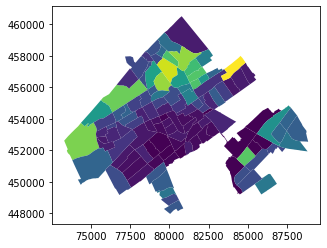

In [10]:
dh_plot_locations.plot(column="ttprs")